In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def ts_load(fn):
    d = pd.read_csv(fn, comment="#")
    ts = pd.to_datetime(d.pop('ts'))
    #d.index = ((ts - ts[0]).astype('timedelta64[s]'))
    d.index = d.pop('step')
    d = pd.rolling_mean(d, 1000)
    #d.resample("1min")
    return d

#train_color = ts_load("20160115-fish-train-color/gen-train.csv")
#plus = ts_load("20160115-fish-plus/gen-train.csv")
#concat_d4 = ts_load("20160116-fish-concat-d4/gen-train.csv")
#concat_d2 = ts_load("20160115-fish-concat-d2/gen-train.csv")
current = ts_load("gen-train.csv")

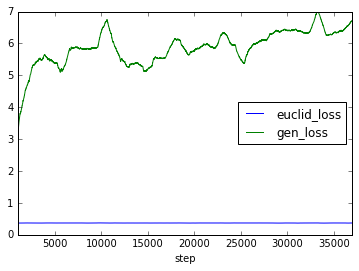

In [24]:
df = pd.DataFrame({
    "euclid_loss": current.euclid_loss, 
    "gen_loss": current.gen_loss,
    #"disc_loss": current.disc_loss,
    #"concat_d2": concat_d2.gen_loss,
    #"concat_d4": concat_d4.gen_loss,
    #"plus": plus.gen_loss,
}, index=current.index)
df = df.dropna(how='any')
ax = df.plot()